# Koding

### Melakukan import library yang dibutuhkan

In [165]:
# import library pandas
import pandas as pd

# Import library numpy
import numpy as np

# Import library matplotlib untuk visualisasi
import matplotlib.pyplot as plt

# import library for build model 
from keras.layers import Dense, Dropout, SimpleRNN, LSTM
from keras.models import Sequential

# import library untuk data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [166]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [167]:
%cd /content/drive/My Drive/Analisis Saham/

/content/drive/My Drive/Analisis Saham


### Load Dataset

In [168]:
#Panggil file (load file bernama Saham2.xlsx) dan simpan dalam dataframe
data = pd.read_excel('Saham2.xlsx')
peramalan_20_des = pd.read_excel('Peramalan tanggal 20 desember.xlsx')
peramalan_23_des = pd.read_excel('peramalan tanggal 23 desember.xlsx')

In [169]:
# tampilkan 5 baris data 
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2012-03-14,5000,5100,5100,4975,20.46M,-0.0099
1,2012-03-15,4975,5000,5050,4950,8.79M,-0.0050
2,2012-03-16,4925,4975,5000,4925,8.12M,-0.0101
3,2012-03-19,4900,4950,4975,4875,7.33M,-0.0051
4,2012-03-20,4875,4925,4925,4825,10.79M,-0.0051


### Review Data

In [170]:
# Melihat Informasi lebih detail mengenai struktur DataFrame dapat dilihat menggunakan fungsi info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2376 entries, 0 to 2375
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2376 non-null   datetime64[ns]
 1   Price     2376 non-null   int64         
 2   Open      2376 non-null   int64         
 3   High      2376 non-null   int64         
 4   Low       2376 non-null   int64         
 5   Vol.      2376 non-null   object        
 6   Change %  2376 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 130.1+ KB


In [171]:
# Kolom 'Price' yang akan kita gunakan dalam membangun model
# Slice kolom 'Price' 
peramalan_20_des = peramalan_20_des.iloc[:,1:2].values
peramalan_23_des = peramalan_23_des.iloc[:,1:2].values
data_price = data.iloc[:,1:2].values

In [172]:
# cek output data_price
data_price         

array([[5000],
       [4975],
       [4925],
       ...,
       [6500],
       [6425],
       [6475]])

In [173]:
peramalan_20_des

array([[6550],
       [6625],
       [6600],
       [6550],
       [6475],
       [6350],
       [6500],
       [6300],
       [6525],
       [6475],
       [6450],
       [6425],
       [6350],
       [6375],
       [6550],
       [6625],
       [6550],
       [6450],
       [6500],
       [6425],
       [6475]])

In [174]:
peramalan_23_des

array([[6550],
       [6475],
       [6350],
       [6500],
       [6300],
       [6525],
       [6475],
       [6450],
       [6425],
       [6350],
       [6375],
       [6550],
       [6625],
       [6550],
       [6450],
       [6500],
       [6425],
       [6475],
       [6375],
       [6375],
       [6300]])

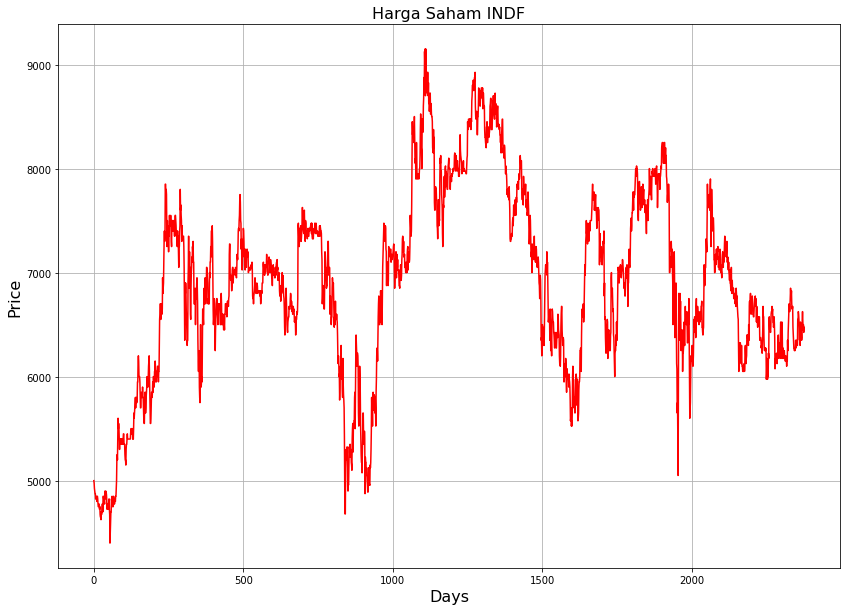

In [175]:
# Visualizing data_price

fig = plt.figure(figsize=(14,10))                 
plt.plot(data_price,c="red")
plt.title("Harga Saham INDF",fontsize=16)
plt.xlabel("Days",fontsize=16)
plt.ylabel("Price",fontsize=16)
plt.grid()
fig.savefig('saham.png')
plt.show()

###  Data Preprocessing

In [176]:
# Menskalakan data antara 1 dan 0 (scaling) pada data_price

scaler = MinMaxScaler(feature_range=(0,1))

In [177]:
price_scaled = scaler.fit_transform(data_price)
peramalan_20_des = scaler.fit_transform(peramalan_20_des)
peramalan_23_des = scaler.fit_transform(peramalan_23_des)

In [178]:
peramalan_20_des

array([[0.76923077],
       [1.        ],
       [0.92307692],
       [0.76923077],
       [0.53846154],
       [0.15384615],
       [0.61538462],
       [0.        ],
       [0.69230769],
       [0.53846154],
       [0.46153846],
       [0.38461538],
       [0.15384615],
       [0.23076923],
       [0.76923077],
       [1.        ],
       [0.76923077],
       [0.46153846],
       [0.61538462],
       [0.38461538],
       [0.53846154]])

In [179]:
# definisikan variabel step dan train 

step_size = 21
train_x = []
train_y = []

In [180]:
# membuat fitur dan lists label

for i in range(step_size,2376):               
    train_x.append(price_scaled[i-step_size:i,0])
    train_y.append(price_scaled[i,0])

In [181]:
price_scaled[21,0]

0.05789473684210522

In [182]:
price_scaled[0:21, 0]

array([0.12631579, 0.12105263, 0.11052632, 0.10526316, 0.1       ,
       0.1       , 0.08947368, 0.08947368, 0.09473684, 0.08947368,
       0.08421053, 0.09473684, 0.09473684, 0.08947368, 0.07894737,
       0.07368421, 0.07368421, 0.07894737, 0.07894737, 0.06842105,
       0.07368421])

In [183]:
price_scaled

array([[0.12631579],
       [0.12105263],
       [0.11052632],
       ...,
       [0.44210526],
       [0.42631579],
       [0.43684211]])

In [184]:
# mengonversi list yang telah dibuat sebelumnya ke array

train_x = np.array(train_x)
train_y = np.array(train_y)
peramalan_20_des = np.array(peramalan_20_des)
peramalan_23_des = np.array(peramalan_23_des)

In [185]:
peramalan_20_des.shape
peramalan_23_des.shape

(21, 1)

In [186]:
# cek dimensi data dengan function .shape

print("Dimensi dari variabel bebas adalah:", train_x.shape) 
print("Dimensi dari variabel terikat adalah:", train_y.shape)                        

Dimensi dari variabel bebas adalah: (2355, 21)
Dimensi dari variabel terikat adalah: (2355,)


In [187]:
# 707 hari terakhir akan digunakan dalam pengujian
# 1648 hari pertama akan digunakan dalam pelatihan

test_x = train_x[1648:]            
train_x = train_x[:1648]           
test_y = train_y[1648:]  
train_y = train_y[:1648]

In [188]:
# reshape data untuk dimasukkan kedalam Keras model

train_x = np.reshape(train_x, (1648, step_size, 1))           
test_x = np.reshape(test_x, (707, step_size, 1))
peramalan_20_des = np.reshape(peramalan_20_des, (1, 21,1))
peramalan_23_des = np.reshape(peramalan_23_des, (1, 21,1))

In [189]:
# cek kembali dimensi data yang telah di reshape dengan function .shape

print(train_x.shape)
print(test_x.shape)    
print(peramalan_20_des.shape)  
print(peramalan_23_des.shape)                  

(1648, 21, 1)
(707, 21, 1)
(1, 21, 1)
(1, 21, 1)


Sekarang kita bisa mulai membuat model kita, dimulai dengan RNN

###  Build Model - RNN

In [190]:
# buat varibel penampung model RNN
rnn_model = Sequential()

In [191]:
# Output dari SimpleRNN akan menjadi bentuk tensor 2D (batch_size, 40) dengan Dropout sebesar 0.15

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True, input_shape=(train_x.shape[1],1)))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=False))
rnn_model.add(Dropout(0.15))

rnn_model.add(Dense(1))

In [192]:
# menambahkan loss function kedalam model RNN dengan tipe MSE

rnn_model.compile(optimizer="adam",loss="MSE")

In [193]:
# fit the model RNN, dengan epoch 20 dan batch size 25

rnn_model.fit(train_x,train_y,epochs=20,batch_size=25)

Epoch 1/20
66/66 [==============================] - 6s 36ms/step - loss: 0.1688
Epoch 2/20
66/66 [==============================] - 2s 35ms/step - loss: 0.0658
Epoch 3/20
66/66 [==============================] - 2s 32ms/step - loss: 0.0422
Epoch 4/20
66/66 [==============================] - 2s 36ms/step - loss: 0.0273
Epoch 5/20
66/66 [==============================] - 2s 32ms/step - loss: 0.0214
Epoch 6/20
66/66 [==============================] - 2s 31ms/step - loss: 0.0184
Epoch 7/20
66/66 [==============================] - 3s 39ms/step - loss: 0.0148
Epoch 8/20
66/66 [==============================] - 2s 35ms/step - loss: 0.0148
Epoch 9/20
66/66 [==============================] - 1s 20ms/step - loss: 0.0124
Epoch 10/20
66/66 [==============================] - 1s 20ms/step - loss: 0.0105
Epoch 11/20
66/66 [==============================] - 1s 20ms/step - loss: 0.0097
Epoch 12/20
66/66 [==============================] - 1s 19ms/step - loss: 0.0095
Epoch 13/20
66/66 [==================

In [194]:
rnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 21, 40)            1680      
                                                                 
 dropout_12 (Dropout)        (None, 21, 40)            0         
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 21, 40)            3240      
                                                                 
 dropout_13 (Dropout)        (None, 21, 40)            0         
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 40)                3240      
                                                                 
 dropout_14 (Dropout)        (None, 40)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                

In [195]:
# Prediksi Model RNN
rnn_predictions = rnn_model.predict(test_x)
rnn_score = r2_score(test_y, rnn_predictions)

In [196]:
rnn_score

0.9330838152112406

In [197]:
peramalan_20_des_rnn = rnn_model.predict(peramalan_20_des)
peramalan_20_des_rnn

array([[0.4823125]], dtype=float32)

In [198]:
peramalan_20_des_rnn = scaler.inverse_transform(peramalan_20_des_rnn)
peramalan_20_des_rnn

array([[6456.7515]], dtype=float32)

In [199]:
peramalan_23_des_rnn = rnn_model.predict(peramalan_23_des)
peramalan_23_des_rnn

array([[0.12875977]], dtype=float32)

In [200]:
peramalan_23_des_rnn = scaler.inverse_transform(peramalan_23_des_rnn)
peramalan_23_des_rnn

array([[6341.8467]], dtype=float32)

###  Build Model - LSTM

In [201]:
# buat varibel penampung model LSTM
lstm_model = Sequential()

In [202]:
# Add a LSTM layer with 40 internal units. dengan Dropout sebesar 0.15

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True, input_shape=(train_x.shape[1],1)))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=False))
lstm_model.add(Dropout(0.15))

# Add a Dense layer with 1 units.
lstm_model.add(Dense(1))

In [203]:
# menambahkan loss function kedalam model lstm dengan tipe MSE

lstm_model.compile(optimizer="adam",loss="MSE")

In [204]:
# fit lstm model, dengan epoch 20 dan batch size 25

lstm_model.fit(train_x,train_y,epochs=20,batch_size=25)

Epoch 1/20
66/66 [==============================] - 8s 37ms/step - loss: 0.0258
Epoch 2/20
66/66 [==============================] - 2s 37ms/step - loss: 0.0068
Epoch 3/20
66/66 [==============================] - 2s 37ms/step - loss: 0.0061
Epoch 4/20
66/66 [==============================] - 2s 37ms/step - loss: 0.0068
Epoch 5/20
66/66 [==============================] - 2s 38ms/step - loss: 0.0060
Epoch 6/20
66/66 [==============================] - 3s 38ms/step - loss: 0.0052
Epoch 7/20
66/66 [==============================] - 2s 36ms/step - loss: 0.0050
Epoch 8/20
66/66 [==============================] - 2s 38ms/step - loss: 0.0053
Epoch 9/20
66/66 [==============================] - 4s 59ms/step - loss: 0.0049
Epoch 10/20
66/66 [==============================] - 5s 72ms/step - loss: 0.0046
Epoch 11/20
66/66 [==============================] - 5s 78ms/step - loss: 0.0045
Epoch 12/20
66/66 [==============================] - 2s 37ms/step - loss: 0.0041
Epoch 13/20
66/66 [==================

In [205]:
# Prediksi Model LSTM
lstm_predictions = lstm_model.predict(test_x)

lstm_score = r2_score(test_y,lstm_predictions)

In [206]:
lstm_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 21, 40)            6720      
                                                                 
 dropout_15 (Dropout)        (None, 21, 40)            0         
                                                                 
 lstm_7 (LSTM)               (None, 21, 40)            12960     
                                                                 
 dropout_16 (Dropout)        (None, 21, 40)            0         
                                                                 
 lstm_8 (LSTM)               (None, 40)                12960     
                                                                 
 dropout_17 (Dropout)        (None, 40)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [207]:
lstm_score

0.8341684802010536

In [208]:
peramalan_20_des_lstm = lstm_model.predict(peramalan_20_des)
peramalan_20_des_lstm

array([[0.6264094]], dtype=float32)

In [209]:
peramalan_20_des_lstm = scaler.inverse_transform(peramalan_20_des_lstm)
peramalan_20_des_lstm

array([[6503.583]], dtype=float32)

In [210]:
peramalan_23_des_lstm = lstm_model.predict(peramalan_23_des)
peramalan_23_des_lstm

array([[0.45974228]], dtype=float32)

In [211]:
peramalan_23_des_lstm = scaler.inverse_transform(peramalan_23_des_lstm)
peramalan_23_des_lstm

array([[6449.4165]], dtype=float32)

### Evaluation

In [212]:
# Cetak nilai prediksi masing-masing model dengan menggunakan r^2 square

print("R^2 Score of RNN",rnn_score)
print("R^2 Score of LSTM",lstm_score)

R^2 Score of RNN 0.9330838152112406
R^2 Score of LSTM 0.8341684802010536


### Visualisasi Perbandingan Hasil Model prediksi dengan data original 

In [213]:
lstm_predictions = scaler.inverse_transform(lstm_predictions)
rnn_predictions = scaler.inverse_transform(rnn_predictions)
test_y = scaler.inverse_transform(test_y.reshape(-1,1))

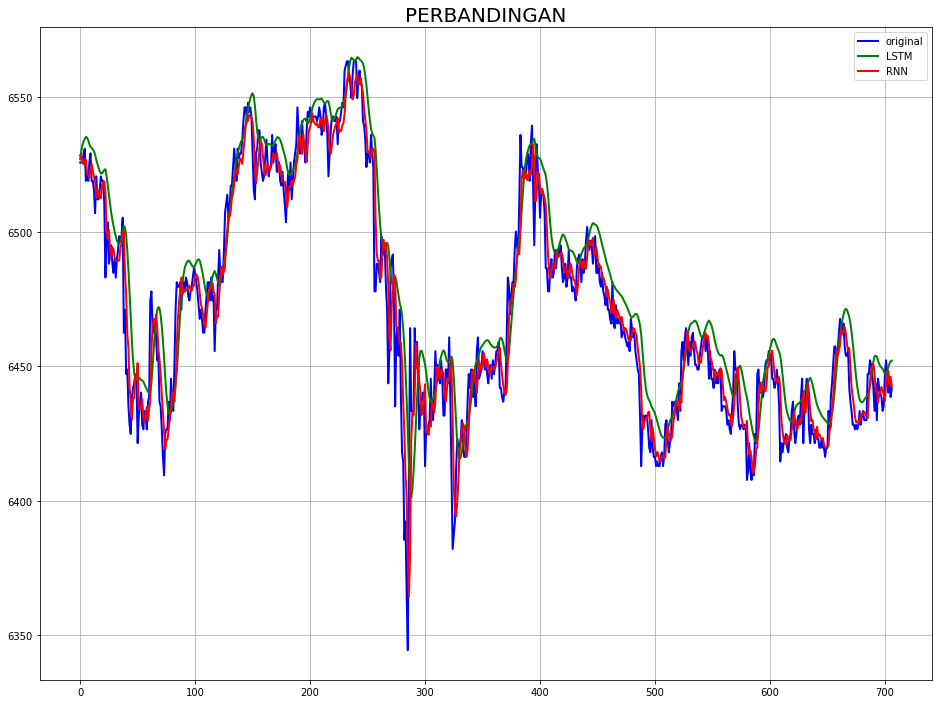

In [214]:
plt.figure(figsize=(16,12))

plt.plot(test_y, c="blue",linewidth=2, label="original")
plt.plot(lstm_predictions, c="green",linewidth=2, label="LSTM")
plt.plot(rnn_predictions, c="red",linewidth=2, label="RNN")
plt.legend()
plt.title("PERBANDINGAN",fontsize=20)
plt.grid()
plt.savefig('peramalan saham.jpg', bbox_inches='tight', dpi=150)
plt.show()